### Language Detection Model

This is a machine learning model designed to detect different natural languages. This project is a subfield of Natural Language Understanding (NLU).

In [1]:
import string
import re

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import feature_extraction
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import pipeline
from matplotlib import pyplot as plt

## Download Data

In [2]:
! wget https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv

--2024-05-20 14:34:49--  https://raw.githubusercontent.com/amankharwal/Website-data/master/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12989063 (12M) [text/plain]
Saving to: ‘dataset.csv.2’

dataset.csv.2       100%[===================>]  12.39M  25.5MB/s    in 0.5s    

2024-05-20 14:34:49 (25.5 MB/s) - ‘dataset.csv.2’ saved [12989063/12989063]



In [3]:
# read the downladed file
df = pd.read_csv("dataset.csv", encoding="utf-8")
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [4]:
# list of different language in dataset
languages_classes = df["language"].unique()
languages_classes

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

In [5]:
print(f"Total tanguages: {len(languages_classes)}")

Total tanguages: 22


In [6]:
df["language"].value_counts().to_frame("Count")

,Count
language,
Estonian,1000
Swedish,1000
English,1000
Russian,1000
Romanian,1000
Persian,1000
Pushto,1000
Spanish,1000
Hindi,1000


In [7]:
# describe the distribtion of feature of dataset
df.describe()

,Text,language
count,22000,22000
unique,21859,22
top,haec commentatio automatice praeparata res ast...,Estonian
freq,48,1000


## Cleaning Data

In [8]:
# loop through punctuation character
# we donot need punctution for language detection
for char in string.punctuation:
  print(char, end=" ")

# map the puctuation unicode character into its integer representation
translate_dict = dict((ord(char), None) for char in string.punctuation)
print(translate_dict)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ {33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 123: None, 124: None, 125: None, 126: None}


In [9]:
# loop through eaxch rows of dataframe
for index, record in df.iterrows():
  text_line = record["Text"]
  if len(text_line) != 0:
    # convert to lowercase
    text_line = text_line.lower()
    # remove all the digit in text
    text_line = re.sub(r"\d+", "", text_line)
    # remove puncuation mark in record
    text_line = text_line.translate(translate_dict)
    record["Text"] = text_line

In [10]:
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [11]:
X_data, y_data = df.iloc[:, 0], df.iloc[:, 1]

# separate train test split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

print(f"Shape of X train: {X_train.shape}")
print(f"Shape of y train: {y_train.shape}")
print(f"Shape of X test: {X_test.shape}")
print(f"Shape of y test: {y_test.shape}")

Shape of X train: (19800,)
Shape of y train: (19800,)
Shape of X test: (2200,)
Shape of y test: (2200,)


### TF-IDF Vectorizer

The TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer is a feature extraction technique used in text processing to convert text data into numerical features that can be used by machine learning algorithms. It combines two metrics:
- **Term Frequency (TF)**: Measures how frequently a term (word or character n-gram) appears in a document. It increases with the number of times a term appears in the document.
- **Inverse Document Frequency (IDF)**: Measures the importance of a term in the entire corpus. It decreases with the number of documents that contain the term, helping to offset the effect of common terms that appear in many documents.

The TF-IDF score is calculated as:
$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$$
where:
- $t$ is the term.
- $d$ is the document.
- $\text{TF}(t, d)$ is the term frequency of $t$ in $d$.
- $\text{IDF}(t)$ is the inverse document frequency of $t$ across the corpus.

The TF-IDF Vectorizer in `sklearn` can be customized with parameters like `ngram_range`, which specifies the range of n-gram sizes to consider, and `analyzer`, which specifies whether to analyze words or characters.

### Gradient Boosting Classifier

The Gradient Boosting Classifier is a powerful ensemble learning algorithm used for classification tasks. It builds an ensemble of decision trees in a stage-wise manner and combines their predictions to improve accuracy. The main idea is to correct the errors of the previous trees by fitting new trees to the residual errors.

Key characteristics of the Gradient Boosting Classifier include:
- **Boosting**: Each new tree is trained to correct the errors made by the previous trees. This iterative process reduces bias and variance, leading to better performance.
- **Gradient Descent**: The algorithm uses gradient descent to minimize the loss function, which measures the difference between the predicted and actual values.
- **Flexibility**: It can handle various types of data and is robust to overfitting if the parameters are tuned correctly.

The `GradientBoostingClassifier` in `sklearn` allows customization through various parameters, such as the number of trees (`n_estimators`), the learning rate (`learning_rate`), and the maximum depth of each tree (`max_depth`).

Together, the TF-IDF Vectorizer and Gradient Boosting Classifier form a powerful combination for text classification tasks, with the vectorizer converting text data into meaningful numerical features and the classifier providing accurate predictions based on those features.

In [12]:
from sklearn import ensemble

# Create a TF-IDF vectorizer that analyzes characters (n-grams of size 1)
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 1), 
                                                     analyzer="char")

# Initialize a Gradient Boosting Classifier
grd_boost = ensemble.GradientBoostingClassifier()

# Create a pipeline that first vectorizes the input data 
# and then applies the classifier
pipe_vec_clf = pipeline.Pipeline([
    ("vectorizer", vectorizer),  # Step 1: Vectorization
    ("grd_boost", grd_boost)     # Step 2: Classification
])

# Fit the pipeline on the training data
pipe_vec_clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(analyzer='char')),
                ('grd_boost', GradientBoostingClassifier())])

In [13]:
from sklearn import metrics

y_pred = pipe_vec_clf.predict(X_test)
# accuracy in 100%
acc = metrics.accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {acc:.2f}")

Accuracy: 96.82


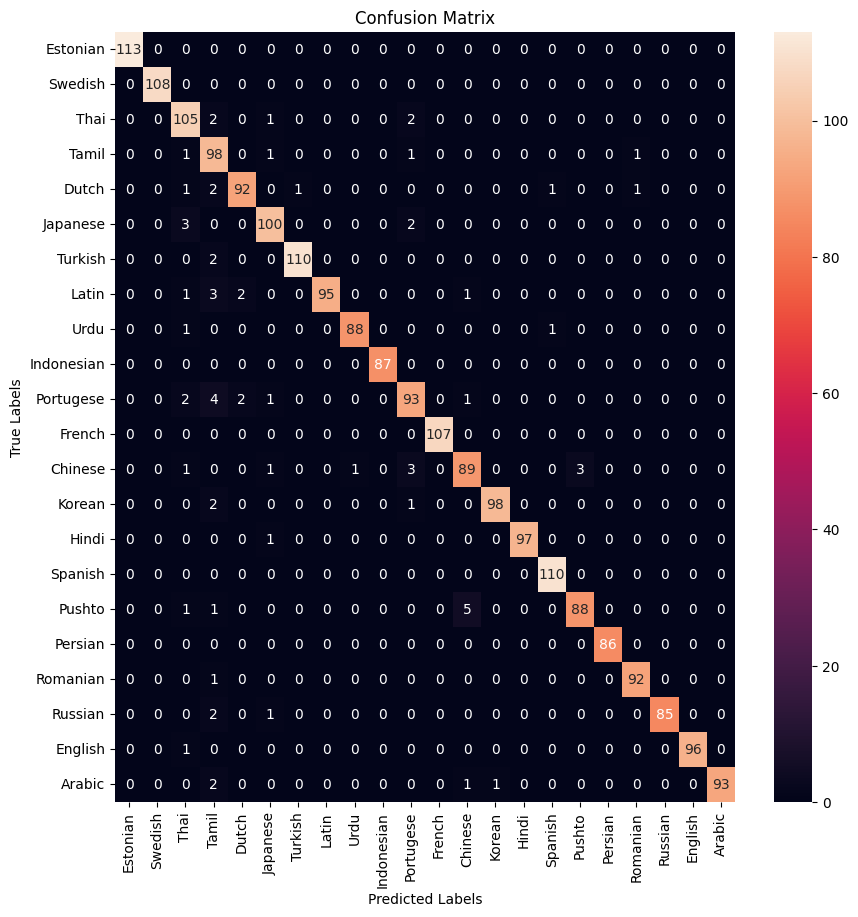

In [14]:
# confusion matrics to see overall performance
cfm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cfm, annot=True, fmt="d", xticklabels=languages_classes, yticklabels=languages_classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


## Save model

In [15]:
import pickle

model_save= open("lang_detection.pickle", "wb")
pickle.dump(pipe_vec_clf, model_save)
model_save.close()

## Load model

In [16]:
import pickle
with open("lang_detection.pickle", "rb") as file:
  model = pickle.load(file)


### Make prediction to Detect the Language

In [17]:
import re
def detect_language(text):

  text = text.lower()
  # remove all the digit in text
  text = re.sub(r"\d+", "", text)
  predict_label = model.predict([text])
  # probability distribution of prediction
  predict_prob = model.predict_proba([text])
  print(predict_label)
  # return predict_label, predict_prob

In [18]:
detect_language("Welcome to real sanjeev github repositiory.")
detect_language("உண்மையான சஞ்சீவ் கிதுப் களஞ்சியத்திற்கு வரவேற்கிறோம்.")
detect_language("असली संजीव जीथब रिपॉजिटरी में आपका स्वागत है।")
detect_language("Bienvenue dans le vrai dépôt github de Sanjeev.")

['Dutch']
['Tamil']
['Hindi']
['French']
